In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [2]:
df = pd.read_csv("../data/vehicles.csv")

# Variables
features = ['brand', 'condition', 'cylinders', 'fuel', 'KM', 'traction', 'vehicleType', 'year']
target = 'price'

# Codificar variables categóricas
df_encoded = pd.get_dummies(df[features], drop_first=True)
X = df_encoded
y = df[target]

# Separar para train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenamiento
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predicciones
y_pred = rf.predict(X_test)

# Métricas para la  evaluación
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Resultados
print("Random Forest")
print(f"R²: {r2:.3f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

Random Forest
R²: 0.839
MAE: 2725.17
RMSE: 4847.85


### Predicciones del modelo

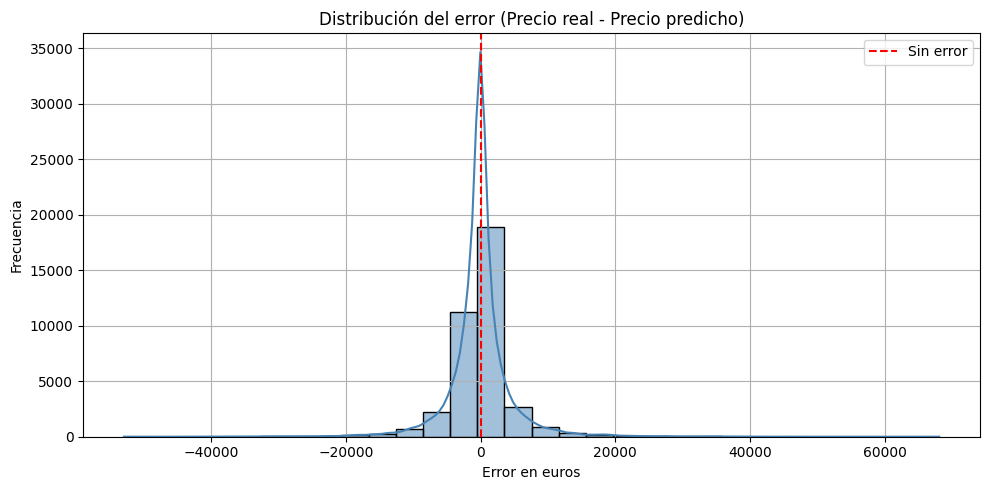

In [ ]:
features = ['brand', 'condition', 'cylinders', 'fuel', 'KM', 'traction', 'vehicleType', 'year']
target = 'price'

# Codificar variables categóricas
df_encoded = pd.get_dummies(df[features], drop_first=True)
X = df_encoded
y = df[target]

# Dividir train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Calcular errores
errores = y_test - y_pred

# Graficar distribución del error
plt.figure(figsize=(10, 5))
sns.histplot(errores, kde=True, bins=30, color='steelblue')
plt.title("Distribución del error (Precio real - Precio predicho)")
plt.xlabel("Error en euros")
plt.ylabel("Frecuencia")
plt.axvline(0, color='red', linestyle='--', label="Sin error")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

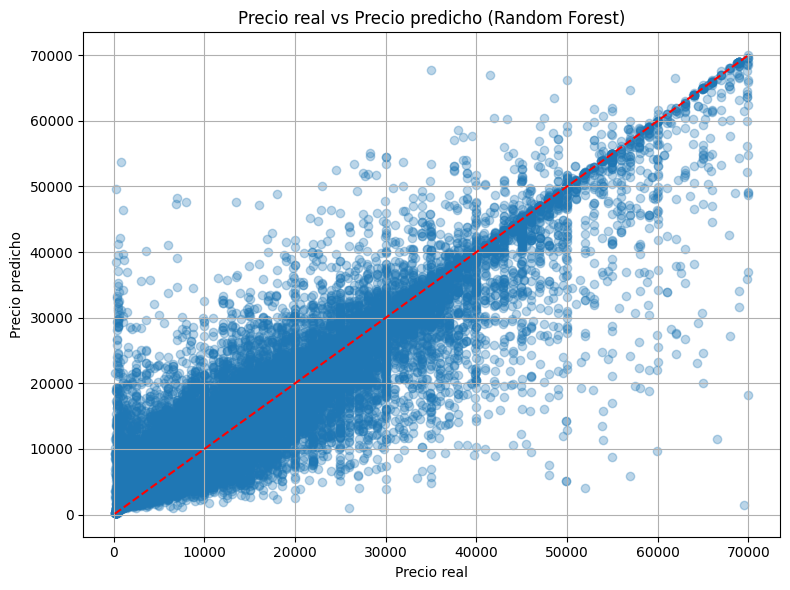

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # línea ideal
plt.xlabel("Precio real")
plt.ylabel("Precio predicho")
plt.title("Precio real vs Precio predicho (Random Forest)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
df_resultados = pd.DataFrame({'Real': y_test, 'Predicho': y_pred})
df_resultados['Error'] = df_resultados['Real'] - df_resultados['Predicho']
print(df_resultados.sort_values(by='Error', ascending=False).head(10))

         Real      Predicho         Error
38826   69500   1454.990000  68045.010000
166352  66500  11542.664444  54957.335556
95180   70000  18160.010000  51839.990000
129709  57000   5941.580000  51058.420000
101989  59900   9678.150000  50221.850000
64753   52000   4105.200000  47894.800000
75410   55000   8774.820000  46225.180000
7438    65000  20019.170000  44980.830000
170324  49900   5098.670000  44801.330000
108926  49900   5098.670000  44801.330000


### Guardado del modelo

In [ ]:
# Guardar el modelo
joblib.dump(rf, '../modeloPrediCoche.pkl')